In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/lp/hgbg7xdj7ql_zq41nk0lt6yw0000gn/T/ipykernel_30756/2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_excel('../dataset/dry_bean.xlsx')

In [3]:
#Check title of feature
df.head

<bound method NDFrame.head of         Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  r

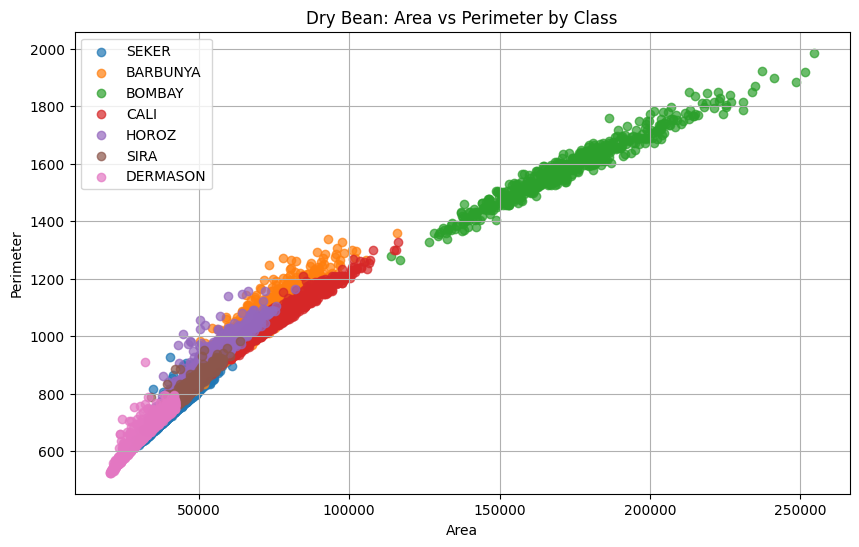

In [4]:
plt.figure(figsize=(10, 6))
for label in df['Class'].unique():
    subset = df[df['Class'] == label]
    plt.scatter(subset['Area'], subset['Perimeter'], label=label, alpha=0.7)
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.title('Dry Bean: Area vs Perimeter by Class')
plt.legend()
plt.grid(True)
plt.show()

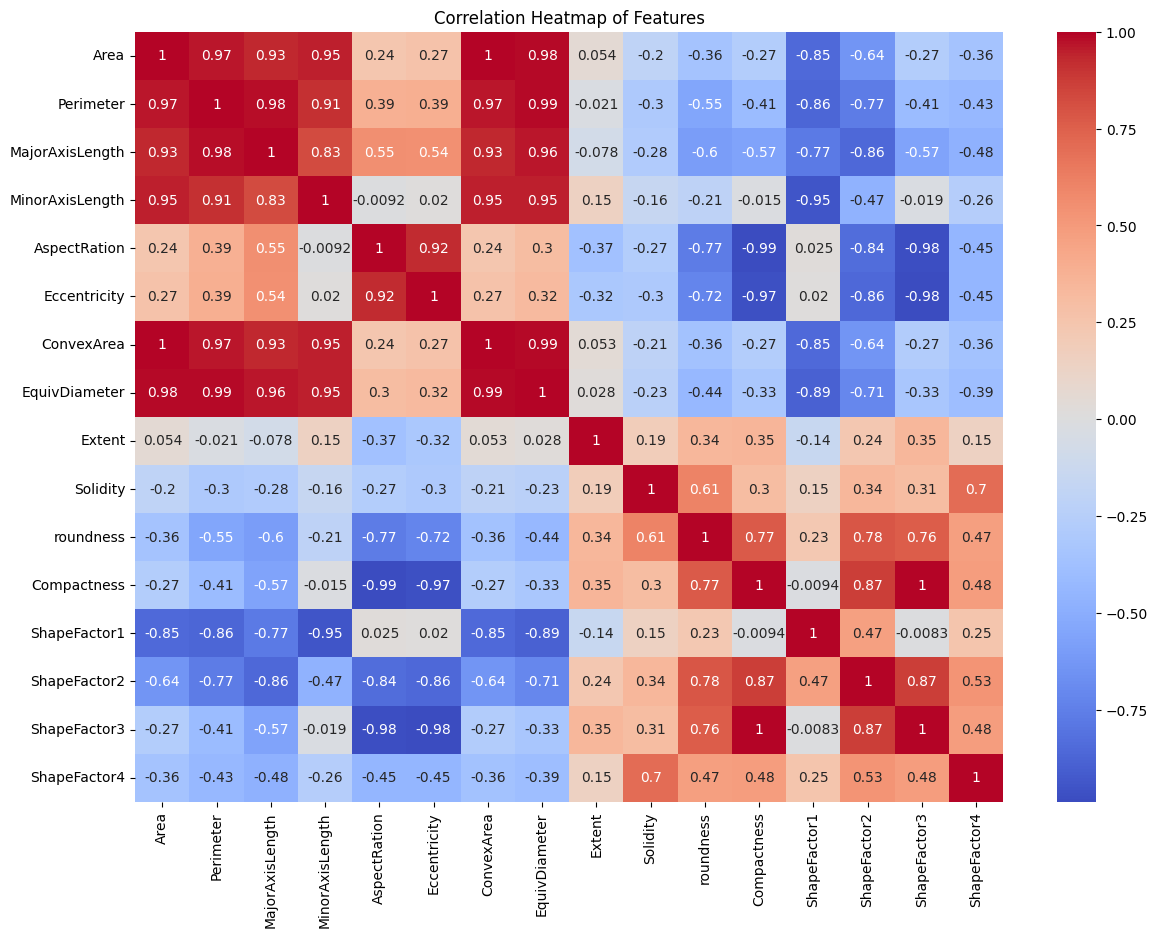

In [5]:
import seaborn as sns

corr = df.drop(columns=['Class']).corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()

In [6]:
X = df.drop(columns='Class').values
y = df['Class'].values

In [7]:
X, y

(array([[2.83950000e+04, 6.10291000e+02, 2.08178117e+02, ...,
         3.14728917e-03, 8.34222388e-01, 9.98723889e-01],
        [2.87340000e+04, 6.38018000e+02, 2.00524796e+02, ...,
         3.56362371e-03, 9.09850506e-01, 9.98430331e-01],
        [2.93800000e+04, 6.24110000e+02, 2.12826130e+02, ...,
         3.04773322e-03, 8.25870617e-01, 9.99066137e-01],
        ...,
        [4.21390000e+04, 7.59321000e+02, 2.81539928e+02, ...,
         1.88827064e-03, 6.76884164e-01, 9.96767264e-01],
        [4.21470000e+04, 7.63779000e+02, 2.83382636e+02, ...,
         1.85202548e-03, 6.68236684e-01, 9.95222420e-01],
        [4.21590000e+04, 7.72237000e+02, 2.95142741e+02, ...,
         1.63981171e-03, 6.16220592e-01, 9.98179623e-01]]),
 array(['SEKER', 'SEKER', 'SEKER', ..., 'DERMASON', 'DERMASON', 'DERMASON'],
       dtype=object))

In [8]:
mean = np.mean(X, axis=0)
mean

array([5.30482845e+04, 8.55283459e+02, 3.20141867e+02, 2.02270714e+02,
       1.58324198e+00, 7.50894929e-01, 5.37682002e+04, 2.53064220e+02,
       7.49732787e-01, 9.87142844e-01, 8.73281831e-01, 7.99863682e-01,
       6.56360851e-03, 1.71594733e-03, 6.43590181e-01, 9.95063312e-01])

In [9]:
std = np.std(X, axis=0)
std

array([2.93230185e+04, 2.14281824e+02, 8.56910379e+01, 4.49684393e+01,
       2.46669394e-01, 9.19983835e-02, 2.97738220e+04, 5.91749462e+01,
       4.90845636e-02, 4.66020796e-03, 5.95177014e-02, 6.17111960e-02,
       1.12795679e-03, 5.95852967e-04, 9.89925138e-02, 4.36629734e-03])

In [11]:
X_scaled = (X - mean) / std
X_scaled

array([[-0.84074853, -1.1433189 , -1.30659814, ...,  2.40217287,
         1.92572347,  0.83837103],
       [-0.82918764, -1.01392388, -1.39591111, ...,  3.10089314,
         2.68970162,  0.77113842],
       [-0.80715717, -1.07882906, -1.25235661, ...,  2.23509147,
         1.84135576,  0.91675514],
       ...,
       [-0.37203825, -0.44783294, -0.45047814, ...,  0.28920441,
         0.33632829,  0.39025114],
       [-0.37176543, -0.42702856, -0.42897404, ...,  0.22837538,
         0.2489734 ,  0.03644001],
       [-0.37135619, -0.38755718, -0.2917356 , ..., -0.12777587,
        -0.2764814 ,  0.71371948]])

In [18]:
#covariance matrix
cov_matrix = np.cov(X_scaled, rowvar=False)
cov_matrix

array([[ 1.00007348,  0.96679321,  0.93190206,  0.95167152,  0.24175256,
         0.26750102,  1.0000127 ,  0.98503989,  0.05434884, -0.19659898,
        -0.35755661, -0.26808652, -0.84802063, -0.63933772, -0.27216484,
        -0.35574757],
       [ 0.96679321,  1.00007348,  0.97740956,  0.91324565,  0.38530395,
         0.39109427,  0.96776031,  0.99145327, -0.02116113, -0.3039919 ,
        -0.54768691, -0.40688676, -0.86468647, -0.76764873, -0.40846531,
        -0.42934132],
       [ 0.93190206,  0.97740956,  1.00007348,  0.82611224,  0.55037521,
         0.54201145,  0.93267554,  0.96180402, -0.07806765, -0.28432317,
        -0.59640139, -0.56841883, -0.77366551, -0.85930078, -0.56822655,
        -0.48256263],
       [ 0.95167152,  0.91324565,  0.82611224,  1.00007348, -0.0091618 ,
         0.01957531,  0.95140923,  0.94860859,  0.14596778, -0.15584227,
        -0.2103594 , -0.01506758, -0.94727376, -0.47138164, -0.01932765,
        -0.26376838],
       [ 0.24175256,  0.38530395,  0

In [13]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [14]:
# Sắp xếp trị riêng theo thứ tự giảm dần
idx_sorted = np.argsort(eigenvalues)[::-1]

eigenvalues_sorted = eigenvalues[idx_sorted]
eigenvectors_sorted = eigenvectors[:, idx_sorted]

In [15]:
W = eigenvectors_sorted[:, :2]  

In [16]:
X_pca = np.dot(X_scaled, W)

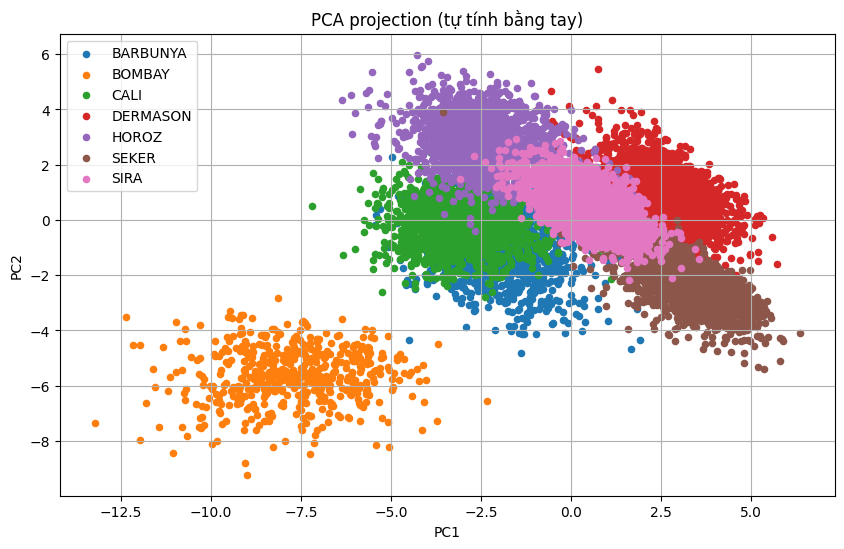

In [17]:
import matplotlib.pyplot as plt

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca['Class'] = y

plt.figure(figsize=(10,6))
for label in np.unique(y):
    subset = df_pca[df_pca['Class'] == label]
    plt.scatter(subset["PC1"], subset["PC2"], label=label, s=20)
plt.legend()
plt.title("PCA projection (tự tính bằng tay)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()